Phasor
cos/sin / 
오일러 function을 이용한 phasor / 오일러 phasor는 공식을 외우는 게 좋음.(저번 시간 필기 참고)
cos과 sin의 component를 동시에 가지는 phasor

In [39]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

각도값만 넣으면 실체의 소리를 만들 수 없음. 

In [49]:
# parameter setting
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz / 1초에 몇개가 들어가는가... time의 개념
dur = 0.5        # in seconds
freq = 400.0     # sine frequency, Hz

In [6]:
theta = np.arange(0,2*np.pi) #각도의 벡터를 어떻게 만들 수 있을까? / 각도의 sequence / arange는 1만큼 뛴다.
theta #theta값을 radian으로 정의한 것임... 1만큼 increasing하면서 벡터 값을 만듦.
#theta가 0부터 2pi까지... 한바퀴 도는 것!

array([0., 1., 2., 3., 4., 5., 6.])

In [7]:
s = np.sin(theta)
s

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ])

theta는 지금 radian의 단위로 정의한 것임... 총 7개의 벡터값이 나옴.
그 값을 지금 s로 받은 것임!
plot하면 sin 곡선이 나옴

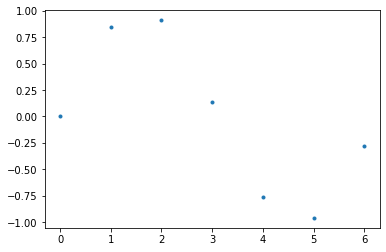

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(theta, s, '.') #plt안의 figure라는 function을 받음...

figure는 화면 전체를 말함.

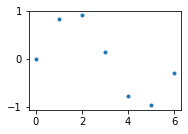

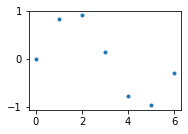

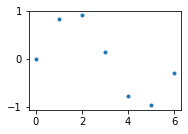

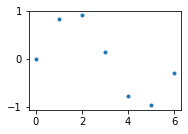

In [10]:
fig = plt.figure()
ax = fig.add_subplot(221) #22 - 두줄, 두열을 만듦... / subplot바로 밑에 실제로 plot하려는 x와 y값을 적어주면됨.
ax.plot(theta, s, '.')
fig = plt.figure()
ax = fig.add_subplot(222)
ax.plot(theta, s, '.')
fig = plt.figure()
ax = fig.add_subplot(223)
ax.plot(theta, s, '.')
fig = plt.figure()
ax = fig.add_subplot(224)
ax.plot(theta, s, '.') #theta는 0부터 2파이까지 만든 것이고, s는 sin function으로 만듦... 두 개의 갯수는 corresponding함
#x축은 theta, y축은 sin함수의 결과값
#sin은 0부터 시작함... 
#지금 현재의 그래프는 너무 sparse함.


In [11]:
theta = np.arange(0,2*np.pi, 0.1) 
theta

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2])

In [13]:
s = np.sin(theta)
s

array([ 0.        ,  0.09983342,  0.19866933,  0.29552021,  0.38941834,
        0.47942554,  0.56464247,  0.64421769,  0.71735609,  0.78332691,
        0.84147098,  0.89120736,  0.93203909,  0.96355819,  0.98544973,
        0.99749499,  0.9995736 ,  0.99166481,  0.97384763,  0.94630009,
        0.90929743,  0.86320937,  0.8084964 ,  0.74570521,  0.67546318,
        0.59847214,  0.51550137,  0.42737988,  0.33498815,  0.23924933,
        0.14112001,  0.04158066, -0.05837414, -0.15774569, -0.2555411 ,
       -0.35078323, -0.44252044, -0.52983614, -0.61185789, -0.68776616,
       -0.7568025 , -0.81827711, -0.87157577, -0.91616594, -0.95160207,
       -0.97753012, -0.993691  , -0.99992326, -0.99616461, -0.98245261,
       -0.95892427, -0.92581468, -0.88345466, -0.83226744, -0.77276449,
       -0.70554033, -0.63126664, -0.55068554, -0.46460218, -0.37387666,
       -0.2794155 , -0.1821625 , -0.0830894 ])

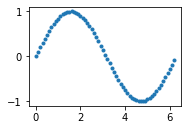

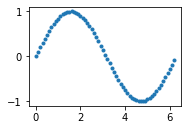

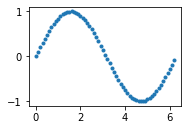

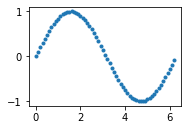

In [14]:
fig = plt.figure()
ax = fig.add_subplot(221) #숫자는 무슨 뜻이지???
ax.plot(theta, s, '.')
fig = plt.figure()
ax = fig.add_subplot(222)
ax.plot(theta, s, '.')
fig = plt.figure()
ax = fig.add_subplot(223)
ax.plot(theta, s, '.')
fig = plt.figure()
ax = fig.add_subplot(224)
ax.plot(theta, s, '.')

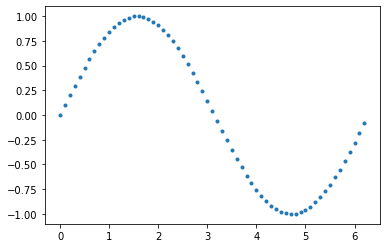

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(theta, s, '.')

Text(0, 0.5, 'value')

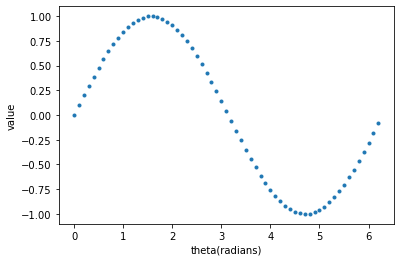

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(theta, s, '.')
ax.set_xlabel('theta(radians)')
ax.set_ylabel('value') #x축 - 0부터 2파이까지.../ x축 상황에서는 같은 간격으로 나뉘지만 y축에서는 그렇지 않음.
#x축에서 equi-distance하지만 y축에서는 그렇지 않다.
#어떤 경우에 그렇고 어떤 경우에 그렇지 않을까?
#linear하는 경우에는 equi-distance함. / line-linear
#linear - x축이 equi-distance하게 변하면 y값도 equi-distance하게 변함.
#non-linear / x와 y의 관계가 line의 형태가 아니다. / ax+b를 제외한 모든 함수
#곡선이 나타난다 = x의 equi-distance한 성격에 y에는 반영이 되지 않는다는 말!


Text(0, 0.5, 'value')

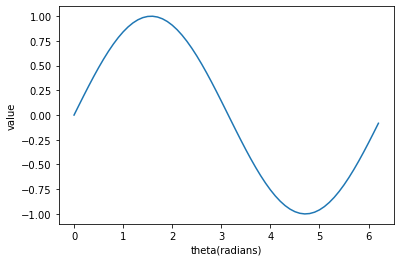

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(theta, s, '-')
ax.set_xlabel('theta(radians)')
ax.set_ylabel('value')

In [20]:
#generate time
t = np.arange(1, sr * dur+1)/sr

Text(0, 0.5, 'value')

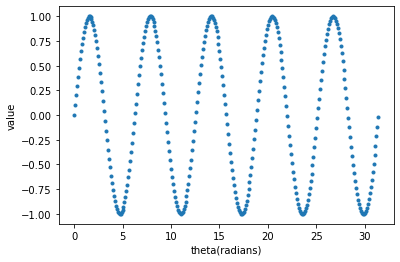

In [24]:
theta = np.arange(0,10*np.pi,0.1)
s = np.sin(theta)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(theta, s, '.')
ax.set_xlabel('theta(radians)')
ax.set_ylabel('value')

In [26]:
#시간은 소리가 있어야 하고, 소리는 시간이 있어야 함.
#현재 위의 그래프는 시간의 개념이 전혀 반영되어 있지 않기에 소리를 만들어낼 수 없음.
#만약 x축이 1초라면... 이런 개념을 넣어줘야 함.
#시간부터 먼저 만들어야 함!!!!
#generate time

In [32]:
t=np.arange(1,sr)
#time tick의 갯수를 만든다고 생각함... / 만약 1초라면 그 time tick은 sampling rate와 일치함.
#위처럼 설정하면 sampling rate만큼의 time tick을 만든느 것임.
t=np.arange(1,sr*dur+1)/sr #sampling rate에 기반해서 time tick을 만듦.
#현재 index를 준 것이지만 이를 초로 바꾸려면 sampling rate로 만들어야 함. / time tick의 index에서 초로 변환함것임.

In [33]:
theta = t * 2*np.pi * freq #time association을 통해 theta를 만듦... / time을 연동시키는 방법!
s = np.sin(theta)

Text(0, 0.5, 'real')

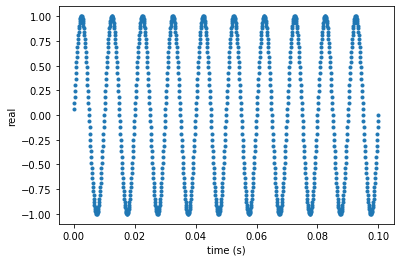

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real') #점들은 모두 2차원 벡터 / 여기 있는 점들의 갯수는? - 1000개 (시험문제)
#만약 s[1:1000]로 고치면 실행이 되지 않음... x와 y의 개수가 corresponding하지 않기 떄문에

Text(0, 0.5, 'real')

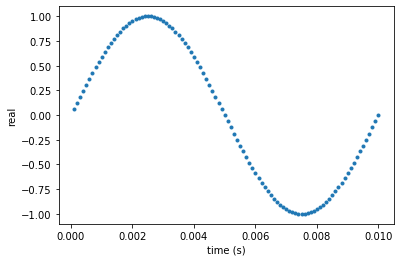

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:100], s[0:100], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real') #점은 총 100개

In [42]:
c = np.exp(theta*1j) #1j = i / 나머지는 모두 고정되어 있으므로 theta만 움직이는 것임.
c #복소수... / a+bi / 원래 값은 하나가 나오지만 그 안에는 a와 b라는 두 가지 정보가 들어있는 것임!
#exponential, 오일러 공식을 쓰면 두 개의 정보가 나옴... / 그 안의 a와 b라는 정보를 따로 받아올 수 있으므로

array([0.99802673+6.27905195e-02j, 0.9921147 +1.25333234e-01j,
       0.98228725+1.87381315e-01j, ..., 0.9921147 -1.25333234e-01j,
       0.99802673-6.27905195e-02j, 1.        +1.96438672e-15j])

In [43]:
#벡터 하나하나가 a+bi의 형태로 되어 있음.
#e-01 / -01 = 1/10
#-02 / 1/100
#c에는 complex number, 복소수의 벡터가 들어있음.
#i를 썼으니까 실수 범위를 넘어선 값들이 나옴.

<IPython.core.display.Javascript object>


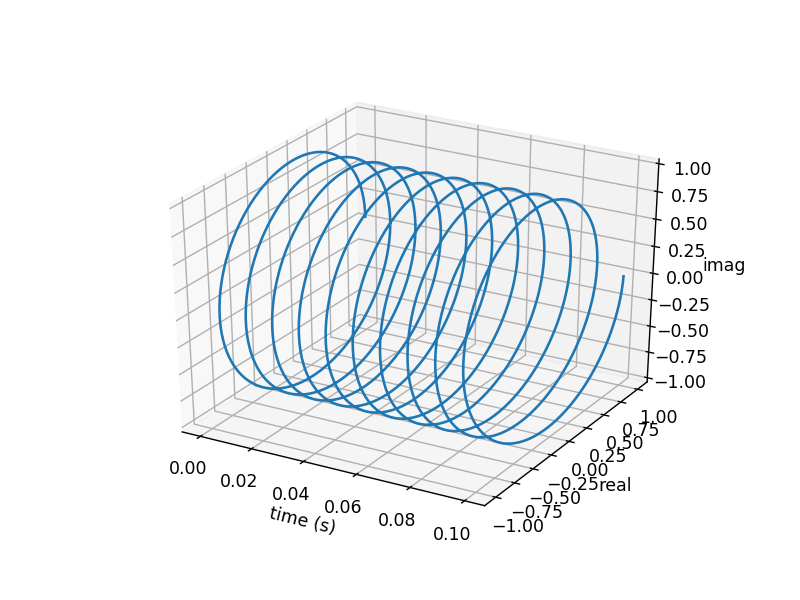

Text(0.5, 0, 'imag')

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '-') #c.real - a+bi에서 a값만 쏙 빼옴. / 
ax.set_xlabel('time (s)')                               #c.imag - b값만 따로 받아옴.
ax.set_ylabel('real')
ax.set_zlabel('imag')
#3차원의 벡터의 값은 그 갯수가 모두 corresponding한다.
#각각 벡터의 차례가 있음. / 각 벡터의 같은 차례가 모여 하나의 점이 된다.
#아래 3차원에도 1000개의 점이 있다.

<IPython.core.display.Javascript object>


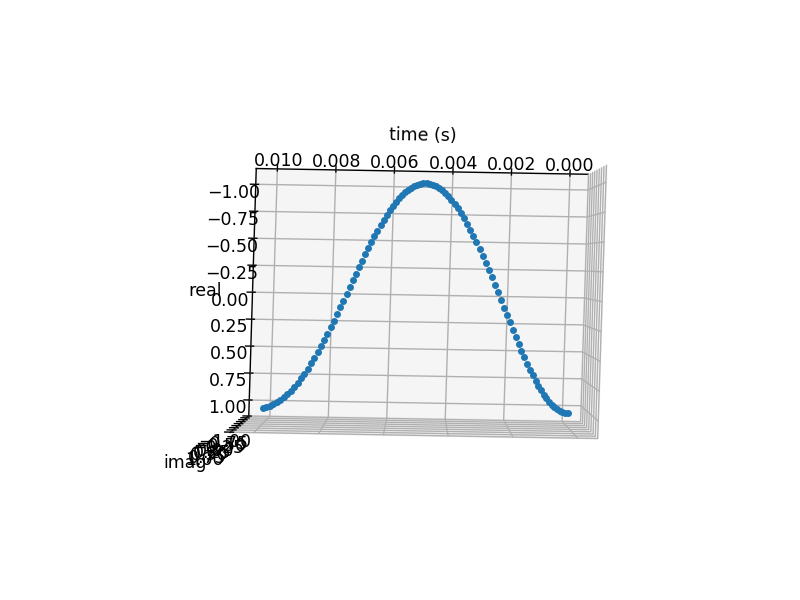

Text(0.5, 0, 'imag')

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:100], c.real[0:100], c.imag[0:100], '.') #c.real - a+bi에서 a값만 쏙 빼옴. / 
ax.set_xlabel('time (s)')                               #c.imag - b값만 따로 받아옴.
ax.set_ylabel('real')
ax.set_zlabel('imag')

오일러 공식
cos... real part / sin... imaginery part

<IPython.core.display.Javascript object>


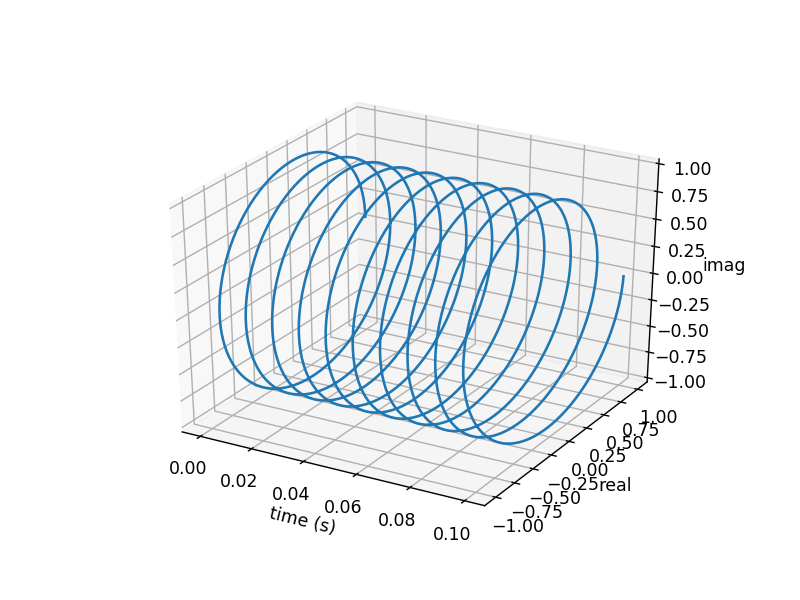

Text(0.5, 0, 'imag')

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '-') #c.real - a+bi에서 a값만 쏙 빼옴. / 
ax.set_xlabel('time (s)')                               #c.imag - b값만 따로 받아옴.
ax.set_ylabel('real')
ax.set_zlabel('imag')

In [50]:
ipd.Audio(s, rate=sr)

In [51]:
ipd.Audio(c.imag, rate=sr)